In [53]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
M_min = 0.08
M_max = 100

In [3]:
alpha1 = 1.3
alpha2 = 2.3

In [4]:
n1estrellas = 100
n2estrellas = 1000
n3estrellas = 10000
n4estrellas = 100000
n5estrellas = 1000000
n6estrellas = 10000000

In [57]:
nestrellas = [n1estrellas,n2estrellas,n3estrellas,n4estrellas]

In [5]:
m1 = np.random.uniform(M_min, M_max, n1estrellas)
m2 = np.random.uniform(M_min, M_max, n2estrellas)
m3 = np.random.uniform(M_min, M_max, n3estrellas)
m4 = np.random.uniform(M_min, M_max, n4estrellas)
m5 = np.random.uniform(M_min, M_max, n5estrellas)
m6 = np.random.uniform(M_min, M_max, n6estrellas)
    

In [6]:
mass_data = [m1, m2, m3, m4, m5, m6]

In [7]:
titles = ['Distribución de 100 estrellas', 'Distribución de 1000 estrellas', 'Distribución de 10000 estrellas', 
          'Distribución de 100000 estrellas', 'Distribución de 1000000 estrellas', 'Distribución de 10000000 estrellas']

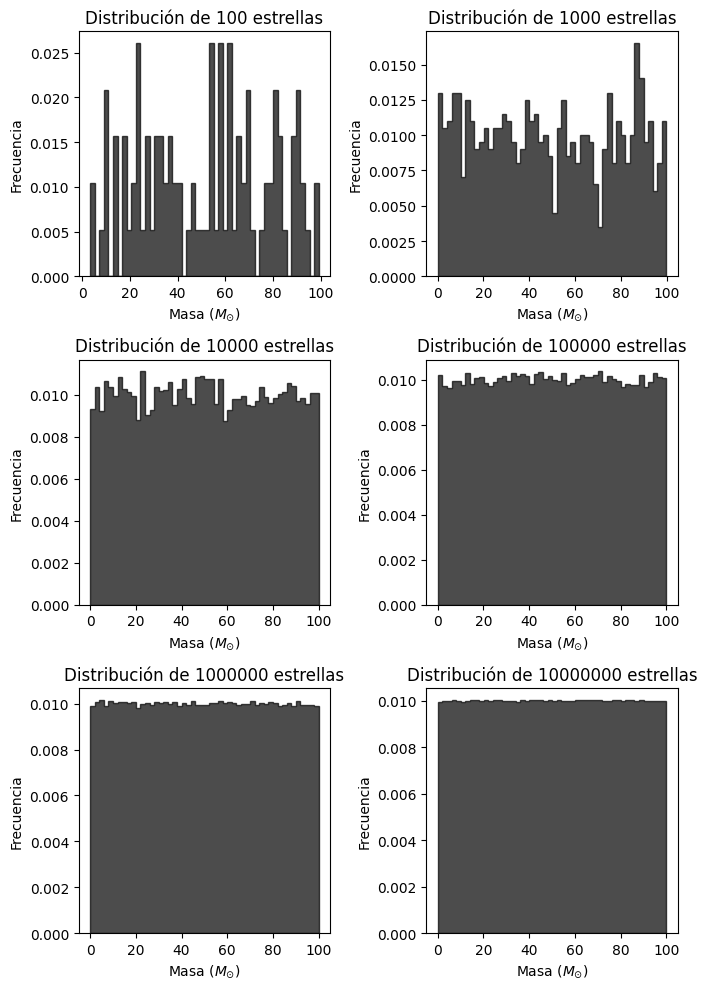

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(7, 10))
axes = axes.flatten()  # Convierte los ejes en una lista para iterar fácilmente

# Graficar cada histograma en su subplot correspondiente
for i in range(6):
    axes[i].hist(mass_data[i], bins=50, color='black', edgecolor='black', alpha=0.7, density=True,histtype='stepfilled')
    axes[i].set_xlabel('Masa ($M_{\odot}$)')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(titles[i])

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

In [9]:
def kroupa_imf(m):
    # Usamos np.where para aplicar la función en diferentes intervalos
    return np.where((0.08 <= m) & (m < 0.5), m**(-alpha1),
                    np.where((0.5 <= m) & (m <= 100), m**(-alpha2), 0))

In [11]:
def sample_masses_kroupa(n_samples, M_min=0.08, M_max=100):
    masses = []
    while len(masses) < n_samples:
        # Generamos una masa aleatoria uniformemente en el rango
        m = np.random.uniform(M_min, M_max)
        # Generamos una probabilidad aleatoria para la aceptación
        p = np.random.uniform(0, 1)
        # Calculamos el valor de la IMF de Kroupa para la masa generada
        if p < kroupa_imf(m) / kroupa_imf(M_min):  # Normalizamos por la IMF en M_min
            masses.append(m)
    return np.array(masses)

muestras_masas1 = sample_masses_kroupa(n1estrellas)
muestras_masas2 = sample_masses_kroupa(n2estrellas)
muestras_masas3 = sample_masses_kroupa(n3estrellas)
muestras_masas4 = sample_masses_kroupa(n4estrellas)



In [34]:
masas_muestras= [muestras_masas1,muestras_masas2,muestras_masas3,muestras_masas4]

In [14]:
Función1 =kroupa_imf(m1)
Función2 =kroupa_imf(m2)
Función3 =kroupa_imf(m3)
Función4 =kroupa_imf(m4)
Función5 =kroupa_imf(m5)
Función6 =kroupa_imf(m6)

In [15]:
weights_data = [Función1,Función2,Función3,Función4,Función5,Función6]

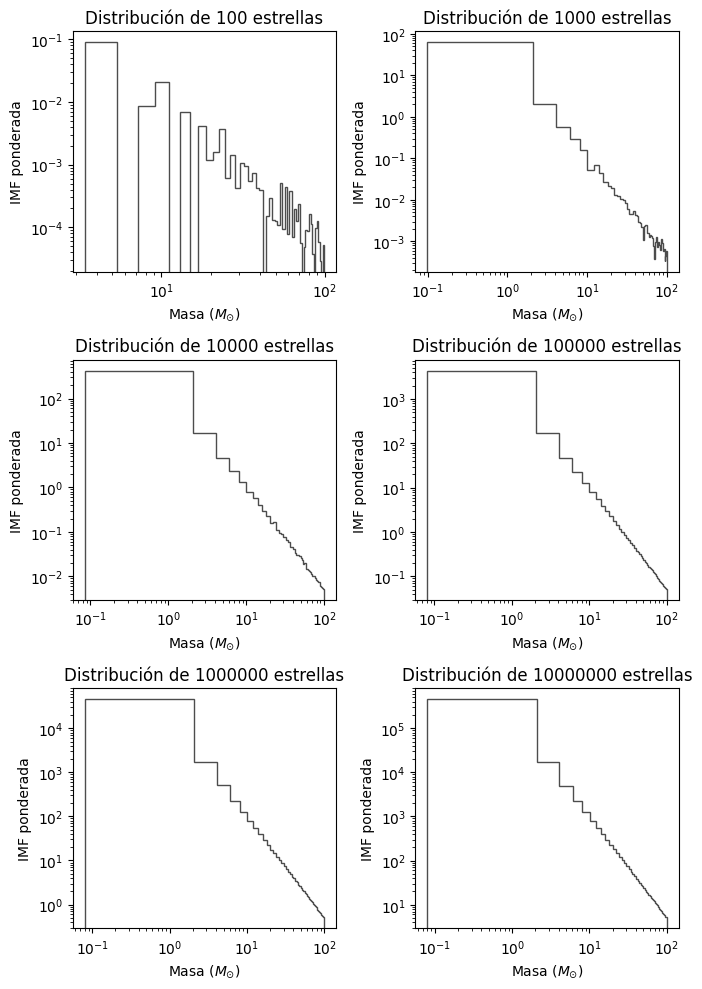

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(7, 10))
axes = axes.flatten()

# Graficar cada histograma con los pesos predefinidos
for i in range(6):
    axes[i].hist(mass_data[i], bins=50, color='skyblue', edgecolor='black', alpha=0.7, weights=weights_data[i],histtype='step')
    axes[i].set_xlabel('Masa ($M_{\odot}$)')
    axes[i].set_ylabel('IMF ponderada')
    axes[i].set_title(titles[i])
    
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')

# Ajuste de espacio entre los subplots
plt.tight_layout()
plt.show()

In [17]:
T_min = 0
T_max = 10

In [18]:
tnacimiento1 = np.random.uniform(T_min, T_max, n1estrellas)
tnacimiento2 = np.random.uniform(T_min, T_max, n2estrellas)
tnacimiento3 = np.random.uniform(T_min, T_max, n3estrellas)
tnacimiento4 = np.random.uniform(T_min, T_max, n4estrellas)
tnacimiento5 = np.random.uniform(T_min, T_max, n5estrellas)
tnacimiento6 = np.random.uniform(T_min, T_max, n6estrellas)

In [35]:
time_nacimiento_data = [tnacimiento1, tnacimiento2, tnacimiento3, tnacimiento4]

In [36]:
titles2 = ['100 estrellas', '1000 estrellas', '10000 estrellas', 
          '100000 estrellas']

IndexError: list index out of range

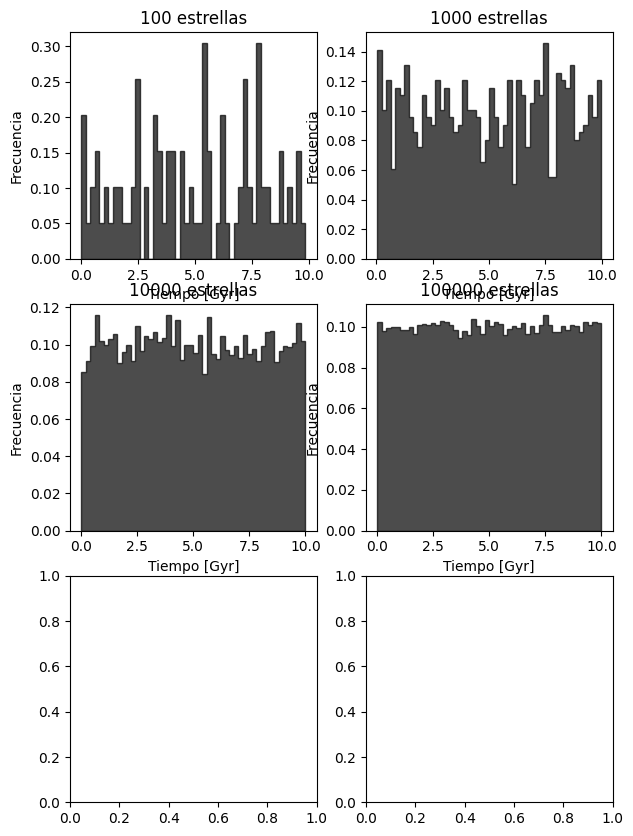

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(7, 10))
axes = axes.flatten()  # Convierte los ejes en una lista para iterar fácilmente

# Graficar cada histograma en su subplot correspondiente
for i in range(6):
    axes[i].hist(time_nacimiento_data[i], bins=50, color='black', edgecolor='black', alpha=0.7, density=True,histtype='stepfilled')
    axes[i].set_xlabel('Tiempo [Gyr]')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_title(titles2[i])

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

In [38]:
#Tiempo en secuencia principal se puede calcular mediante: t = 10^(10) / Masa^(2.5), el 10^(10) es por la vida en la secuencia principal de nuestro Sol.

tsp1 = (10**10)/((muestras_masas1)**(2.5))
tsp2 = (10**10)/((muestras_masas2)**(2.5))
tsp3 = (10**10)/((muestras_masas3)**(2.5))
tsp4 = (10**10)/((muestras_masas4)**(2.5))

In [39]:
#Como las estrellas pueden generarse a los 0[Gyr] o a los 10[Gyr], para tener la edad que llevan "viviendo" sería la resta de 10[Gyr] y su edad en la que nacieron
edad1 = tnacimiento1*10**9
edad2 = tnacimiento2*10**9
edad3 = tnacimiento3*10**9
edad4 = tnacimiento4*10**9
edad5 = tnacimiento5*10**9
edad6 = tnacimiento6*10**9

In [40]:
edad4

array([8.26059168e+09, 3.09144641e+09, 6.66913779e+09, ...,
       4.00642576e+09, 5.06882862e+09, 4.15674035e+09])

In [41]:
#como nos dice la guía, todas las estrellas que su edad supere a time secuencia principal son remanentes, vamos a clasificarlas con eso
estrellasrema1 = (edad1 >tsp1)
estrellasrema2 = (edad2 >tsp2)
estrellasrema3 = (edad3 >tsp3)
estrellasrema4 = (edad4 >tsp4)


In [42]:
print("Estrellas remanentes en 100 estrellas:", np.sum(estrellasrema1))
print("Estrellas remanentes en 1000 estrellas:", np.sum(estrellasrema2))
print("Estrellas remanentes en 10000 estrellas:", np.sum(estrellasrema3))
print("Estrellas remanentes en 100000 estrellas:", np.sum(estrellasrema4))



Estrellas remanentes en 100 estrellas: 6
Estrellas remanentes en 1000 estrellas: 109
Estrellas remanentes en 10000 estrellas: 1045
Estrellas remanentes en 100000 estrellas: 10289


In [77]:
10289/100000



0.10289

In [43]:
# función para clasificar el tipo de remanente
def class_remnant(mass):
    if mass >=18.5:
        return 'Agujero Negro'
    elif 9 <= mass < 18.5:
        return 'Estrella de Neutrones'
    else:
        return 'Enana Blanca'

In [46]:
estrellasMs1 = (edad1 >tsp1)
estrellasMs2 = (edad2 >tsp2)
estrellasMs3 = (edad3 >tsp3)
estrellasMs4 = (edad4 >tsp4)

In [51]:
def main_sequence(masas):
    return 10**10 / (masas**2.5)

In [54]:
# Almacenamos los resultados de cada simulación
remnant_counts_dict = {}
remnant_masses_dict = {'Enana Blanca': [], 'Estrella de Neutrones': [], 'Agujero Negro': []}

# Bucle para procesar cada conjunto de estrellas

for masas, birth_times, title in zip(masas_muestras, time_nacimiento_data, titles2):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9

    # Identificar remanentes y clasificarlos
    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])
    
    # Contar tipos de remanentes
    remnant_counts_dict[title] = Counter(remnants_types)

    # Almacenar masas por tipo de remanente
    for mass, remnant_type in zip(masas[stellar_remnants], remnants_types):
        remnant_masses_dict[remnant_type].append(mass)

    # Imprimir resultados de la clasificación
    print(f"Remanentes en {title}: {remnant_counts_dict[title]}")

Remanentes en 100 estrellas: Counter({'Enana Blanca': 5})
Remanentes en 1000 estrellas: Counter({'Enana Blanca': 90, 'Estrella de Neutrones': 4, 'Agujero Negro': 3})
Remanentes en 10000 estrellas: Counter({'Enana Blanca': 940, 'Estrella de Neutrones': 58, 'Agujero Negro': 25})
Remanentes en 100000 estrellas: Counter({'Enana Blanca': 9299, 'Estrella de Neutrones': 557, 'Agujero Negro': 308})


In [80]:
308/100000


0.00308

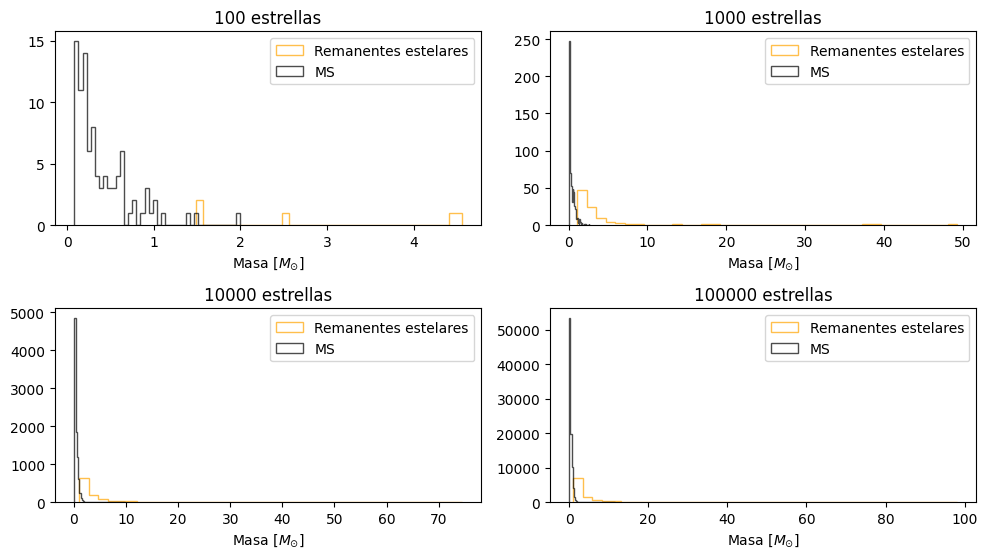

In [74]:
plt.figure(figsize=(10, 8))
for i, (masas, birth_times, title) in enumerate(zip(masas_muestras, time_nacimiento_data, titles2), 1):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9
    stellar_remnants = ages > TMS
    
    plt.subplot(3, 2, i)
    plt.hist(masas[stellar_remnants], bins=40, color='orange', alpha=0.7, histtype='step', label='Remanentes estelares')
    plt.hist(masas[~stellar_remnants], bins=40, color='black', alpha=0.7, histtype='step', label='MS')
    plt.title(title)
    plt.xlabel('Masa [$M_{\odot}$]')
    plt.legend()

plt.tight_layout()
plt.show()

In [59]:
# Diccionario para almacenar masas finales de enanas blancas
white_dwarf_final_masses = {}

# Procesar cada simulación
for masas, birth_times, title in zip(masas_muestras, time_nacimiento_data,nestrellas):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9

    # Identificar y clasificar remanentes
    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    # Calcular la masa final de las enanas blancas
    white_dwarf_masses = masas[stellar_remnants][remnants_types == 'Enana Blanca']
    white_dwarf_final_masses[title] = 0.109 * white_dwarf_masses + 0.309

# Mostrar los resultados de la masa final de enanas blancas para cada simulación
for title, masses in white_dwarf_final_masses.items():
    print(f"Masa final de Enanas Blancas en simulación de {title} estrellas: {masses}")

Masa final de Enanas Blancas en simulación de 100 estrellas: [0.47900247 0.79055468 0.80545759 0.4710577  0.58444048]
Masa final de Enanas Blancas en simulación de 1000 estrellas: [0.50253114 0.74081597 0.53709186 0.69202107 0.68341639 0.4330635
 0.44047445 0.69220846 0.51438493 0.94209644 0.8211542  0.51343605
 0.49574907 0.58813711 0.449245   0.51115922 0.66260012 0.59907071
 0.54433156 0.44349195 0.50677804 0.62881165 0.66085648 0.57747179
 0.85117664 1.05387935 0.64600888 0.53139754 0.5026779  0.46855305
 0.46935407 0.90244019 0.49905673 0.465083   0.95355678 0.56885859
 0.50005601 0.6543166  0.42702359 0.43331583 0.66377453 0.45128454
 0.44641351 0.70013777 0.61469771 0.48038355 0.45793849 0.56286555
 0.48741836 0.56167031 0.59962324 0.4766017  0.51229119 0.47272005
 0.53402568 0.67889873 0.58373762 0.44525194 0.60145109 0.43016061
 0.48460851 0.43250732 1.26592162 0.69707027 0.57941922 0.58926844
 0.4369923  0.51418664 0.43345836 0.66693671 0.57450672 0.46141048
 0.67104625 1.021

In [60]:
# función para calcular la masa de estrellas de neutrones
def neutron_star_mass(M_ZAMS):
    if 9 <= M_ZAMS <= 13:
        return 2.24 + 0.508 * (M_ZAMS - 14.75) + 0.125 * (M_ZAMS - 14.75)**2 + 0.0110 * (M_ZAMS - 14.75)**3
    elif 15 <= M_ZAMS < 17.8:
        return 0.996 + 0.0384 * M_ZAMS
    elif 17.8 < M_ZAMS < 18.5:
        return -0.020 + 0.10 * M_ZAMS
    else:
        return None
    
# Diccionario para almacenar las masas finales de las estrellas de neutrones
neutron_star_final_masses = {}

# Procesar cada simulación
for masas, birth_times, title in zip(masas_muestras, time_nacimiento_data,nestrellas):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9

    # Identificar remanentes y clasificarlos
    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    # Calcular la masa final de las estrellas de neutrones
    neutron_star_masses = masas[stellar_remnants][remnants_types == 'Estrella de Neutrones']
    final_masses = []
    for M_ZAMS in neutron_star_masses:
        final_mass = neutron_star_mass(M_ZAMS)
        if final_mass is not None:  # Solo agrega si final_mass es válido
            final_masses.append(final_mass)
    neutron_star_final_masses[title] = np.array(final_masses)

# Mostrar resultados de masa final de estrellas de neutrones para cada simulación
for title, masses in neutron_star_final_masses.items():
    print(f"Masa final de Estrellas de Neutrones en simulación de {title} estrellas: {masses}")

Masa final de Estrellas de Neutrones en simulación de 100 estrellas: []
Masa final de Estrellas de Neutrones en simulación de 1000 estrellas: [1.78199871 1.64945797]
Masa final de Estrellas de Neutrones en simulación de 10000 estrellas: [1.52382406 1.64611713 1.52042866 1.49317278 1.58454994 1.51663679
 1.54047879 1.54597249 1.49270091 1.50982521 1.45423518 1.61171034
 1.38353587 1.47305497 1.81431426 1.6054962  1.6717297  1.57769658
 1.67940551 1.5302416  1.61195263 1.80140376 1.43576523 1.4427442
 1.48207952 1.47519883 1.42992887 1.59408845 1.54181818 1.57669201
 1.50305785 1.36873123 1.52139602 1.44047989 1.60588688 1.62177125
 1.81322418 1.55419623 1.63917217 1.54875529 1.48669023 1.5760444
 1.61148869 1.55690461 1.51776265 1.6746453  1.41349535]
Masa final de Estrellas de Neutrones en simulación de 100000 estrellas: [1.63441796 1.59546136 1.45983956 1.59413365 1.47532646 1.54746363
 1.4558494  1.40257872 1.64179602 1.65420665 1.38075616 1.49015514
 1.50196021 1.66296965 1.47220346

In [63]:
# Función para calcular la masa de agujeros negros
def black_hole_mass(M_ZAMS):
    if 15 <= M_ZAMS <= 25.97:
        return -2.049 + 0.4140 * M_ZAMS
    elif 25.97 < M_ZAMS <= 40:
        return 15.52 - 0.3294 * (M_ZAMS - 25.97) - 0.02121 * (M_ZAMS - 25.97)**2 + 0.003120 * (M_ZAMS - 25.97)**3
    elif 45 <= M_ZAMS <= 120:
        return 5.697 + 7.8598 * M_ZAMS * 10**8 * (M_ZAMS)**-4.858
    else:
        return None  # Fuera de los rangos definidos

# Diccionario para almacenar las masas finales de los agujeros negros
black_hole_final_masses = {}

# Procesar cada simulación
for masas, birth_times, title in zip(masas_muestras, time_nacimiento_data,nestrellas):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9

    # Identificar remanentes y clasificarlos
    stellar_remnants = ages > TMS
    remnants_types = np.array([class_remnant(m) for m in masas[stellar_remnants]])

    # Calcular la masa final de los agujeros negros
    black_hole_masses = masas[stellar_remnants][remnants_types == 'Agujero Negro']
    final_masses = []
    for M_ZAMS in black_hole_masses:
        final_mass = black_hole_mass(M_ZAMS)
        if final_mass is not None:  # Solo agrega si final_mass es válido
            final_masses.append(final_mass)
    black_hole_final_masses[title] = np.array(final_masses)

# Mostrar resultados de masa final de agujeros negros para cada simulación
for title, masses in black_hole_final_masses.items():
    print(f"Masa final de Agujeros Negros en simulación de {title} estrellas: {masses}")

Masa final de Agujeros Negros en simulación de 100 estrellas: []
Masa final de Agujeros Negros en simulación de 1000 estrellas: [ 13.7598007   14.65522304 237.36812602]
Masa final de Agujeros Negros en simulación de 10000 estrellas: [ 13.56688285  14.45410206   8.02443649  14.53568361 318.07969179
  80.60855435  15.37783381   7.16530182   7.2554752   14.36966366
 166.63979168   6.89008051  13.81665404  13.66487612  14.21896933
   5.90459915  13.41231026   7.02967161  14.57369394   6.89860216
  13.59330025  52.87170322   6.74470641 244.72682049  13.69684632]
Masa final de Agujeros Negros en simulación de 100000 estrellas: [161.20546554  97.49700329   6.58669843   6.62912688   7.72236152
   6.40673604   6.79420294   8.36985932  13.87052376 122.57586846
   6.92447004   6.09579003  13.89064768   8.50242212  14.39803924
   7.40349896  13.13641554  14.97343446  13.80626702 108.12273028
   8.27427349   8.58828004   6.93303286 146.94868263 103.72565702
  13.14530758  13.72407307   6.31535101  

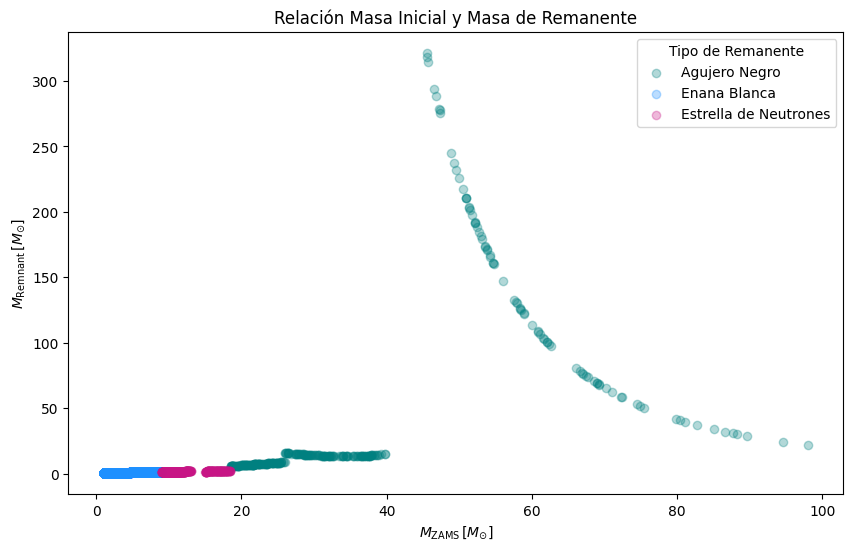

In [69]:
# Preparar listas para almacenar las masas iniciales (M_ZAMS) y finales (M_remnant)
mzams_values = []
remnant_masses = []
remnant_types = []

# Extraer los datos de masas iniciales y finales para cada tipo de remanente
for masas, birth_times, title in zip(masas_muestras, time_nacimiento_data,titles2):
    TMS = main_sequence(masas)
    ages = 10**10 - birth_times * 10**9
    stellar_remnants = ages > TMS
    
    # Para cada tipo de remanente, agregar M_ZAMS y su masa final correspondiente
    for mass in masas[stellar_remnants]:
        remnant_type = class_remnant(mass)
        
        if remnant_type == 'Enana Blanca':
            final_mass = 0.109 * mass + 0.309
        elif remnant_type == 'Estrella de Neutrones':
            final_mass = neutron_star_mass(mass)
        elif remnant_type == 'Agujero Negro':
            final_mass = black_hole_mass(mass)
        else:
            continue
        
        # Solo agregar si final_mass es válido
        if final_mass is not None:
            mzams_values.append(mass)
            remnant_masses.append(final_mass)
            remnant_types.append(remnant_type)

# Convertir a arrays para graficar
mzams_values = np.array(mzams_values)
remnant_masses = np.array(remnant_masses)
remnant_types = np.array(remnant_types)

# Graficar M_ZAMS vs. Masa de Remanente
plt.figure(figsize=(10, 6))
colors = {'Enana Blanca': 'dodgerblue', 'Estrella de Neutrones': 'mediumvioletred', 'Agujero Negro': 'teal'}

for remnant in np.unique(remnant_types):
    plt.scatter(mzams_values[remnant_types == remnant], 
                remnant_masses[remnant_types == remnant], 
                label=remnant, color=colors[remnant], alpha=0.3)

plt.xlabel('$M_{\\text{ZAMS}} \, [M_{\odot}]$')
plt.ylabel('$M_{\\text{Remnant}} \, [M_{\odot}]$')
plt.legend(title="Tipo de Remanente")
plt.title('Relación Masa Inicial y Masa de Remanente')
plt.grid(False)
plt.show()